### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
india_cc = pd.read_csv("Credit card transactions - India - Simple.csv")
india_cc.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [3]:
india_cc.shape

(26052, 7)

In [4]:
#Converting the amount to USD using the current exchange rate of (0.012)

exchange_rate = 0.012  
india_cc['Amount_usd'] = (india_cc['Amount'] * exchange_rate).round(2) 

print(india_cc[['Amount', 'Amount_usd']])

       Amount  Amount_usd
0       82475      989.70
1       32555      390.66
2      101738     1220.86
3      123424     1481.09
4      171574     2058.89
...       ...         ...
26047  128191     1538.29
26048  246316     2955.79
26049  265019     3180.23
26050   88174     1058.09
26051  184410     2212.92

[26052 rows x 2 columns]


In [5]:
india_cc.head(10)


,index,City,Date,Card Type,Exp Type,Gender,Amount,Amount_usd
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475,989.70
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,390.66
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,1220.86
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,1481.09
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574,2058.89
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036,1200.43
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250,1719.00
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980,1811.76
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247,2306.96
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932,815.18


- checking for missing data

In [6]:
india_cc.isnull().sum()

index         0
City          0
Date          0
Card Type     0
Exp Type      0
Gender        0
Amount        0
Amount_usd    0
dtype: int64

- confirming column dtypes

In [7]:
india_cc.dtypes

index           int64
City           object
Date           object
Card Type      object
Exp Type       object
Gender         object
Amount          int64
Amount_usd    float64
dtype: object

- converting Date column to datetime type

In [8]:
india_cc['Date'] = pd.to_datetime(india_cc['Date'])
india_cc.dtypes

index                  int64
City                  object
Date          datetime64[ns]
Card Type             object
Exp Type              object
Gender                object
Amount                 int64
Amount_usd           float64
dtype: object

- removing excess texts from the City column

In [9]:
india_cc['City'] = india_cc['City'].str.replace(', India', '')
india_cc['City'].head(10)

0             Delhi
1    Greater Mumbai
2         Bengaluru
3    Greater Mumbai
4         Bengaluru
5             Delhi
6             Delhi
7    Greater Mumbai
8             Delhi
9             Delhi
Name: City, dtype: object

In [10]:
india_cc.sort_values('Amount', ascending= False).head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount,Amount_usd
80,80,Greater Mumbai,2014-10-14,Platinum,Bills,F,998077,11976.92
134,134,Delhi,2013-10-27,Gold,Bills,F,996754,11961.05
254,254,Ahmedabad,2015-04-17,Gold,Bills,F,996291,11955.49
183,183,Ahmedabad,2014-08-27,Platinum,Bills,F,995634,11947.61
330,330,Delhi,2014-06-07,Signature,Bills,F,994537,11934.44
343,343,Greater Mumbai,2014-09-06,Signature,Bills,F,994184,11930.21
68,68,Greater Mumbai,2014-03-22,Gold,Bills,F,991685,11900.22
141,141,Greater Mumbai,2013-10-04,Gold,Bills,F,990700,11888.40
28,28,Bengaluru,2015-01-18,Platinum,Bills,F,987935,11855.22
17,17,Greater Mumbai,2015-03-30,Gold,Bills,F,986379,11836.55


-  Gender has the highest total amount 

In [11]:
amount_by_gender = india_cc.groupby('Gender')['Amount_usd'].sum()
amount_by_gender

Gender
F    26463732.23
M    22434268.20
Name: Amount_usd, dtype: float64

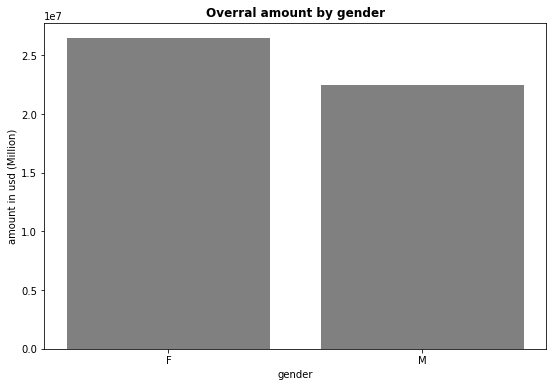

In [12]:
plt.figure(figsize= (9,6))
plt.bar( x= amount_by_gender.index,
        height= amount_by_gender.values ,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (Million)')
plt.title('Overral amount by gender', fontsize = 12, fontweight = 'bold' )
plt.show()

- Which date had the highest and lowest total amount ?

In [13]:
#Getting total amount of each day
amount_by_date = india_cc.groupby('Date')['Amount_usd'].sum()
amount_by_date

Date
2013-10-04    116865.06
2013-10-05     96751.60
2013-10-06     83880.66
2013-10-07     93875.90
2013-10-08     69990.42
                ...    
2015-05-22     79366.35
2015-05-23     76725.57
2015-05-24     86062.95
2015-05-25     62120.04
2015-05-26     91102.06
Name: Amount_usd, Length: 600, dtype: float64

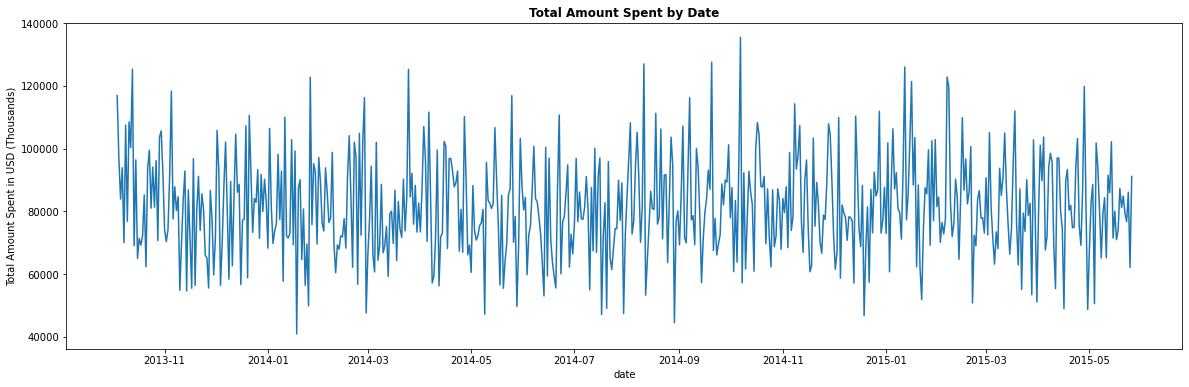

In [14]:
plt.figure(figsize = (20,6))
plt.plot(amount_by_date.index, amount_by_date.values,)
plt.xlabel('date')
plt.ylabel('Total Amount Spent in USD (Thousands)')
plt.title('Total Amount Spent by Date', fontsize = 12, fontweight = 'bold')
plt.show()

In [15]:
#Highest
amount_by_date.sort_values(ascending = False).head(1)

Date
2014-10-07    135389.5
Name: Amount_usd, dtype: float64

In [16]:
#Lowest
amount_by_date.sort_values(ascending = True).head(1)

Date
2014-01-18    40902.19
Name: Amount_usd, dtype: float64

- avg & max amount  of transactions per gender 

In [17]:
#Average amount
india_cc.groupby('Gender')['Amount_usd'].mean().round(2)

Gender
F    1934.48
M    1813.31
Name: Amount_usd, dtype: float64

In [18]:
#Max amount
india_cc.groupby('Gender')['Amount_usd'].max()

Gender
F    11976.92
M     3599.77
Name: Amount_usd, dtype: float64

- Location
- Which city has the highest and lowest total expenses?

In [19]:
#Highest
india_cc.groupby('City')['Amount_usd'].sum().sort_values( ascending = False).head(5)

City
Greater Mumbai    6921017.62
Bengaluru         6867920.69
Ahmedabad         6813531.95
Delhi             6683150.35
Kolkata           1385603.25
Name: Amount_usd, dtype: float64

In [20]:
#Lowest
india_cc.groupby('City')['Amount_usd'].sum().sort_values( ascending = True).head(5)

City
Fazilka          179.39
Mahbubnagar      185.50
Bahraich         291.04
Tirur            313.13
Changanassery    360.89
Name: Amount_usd, dtype: float64

In [21]:
amount_by_city_gender = india_cc.groupby(['City', 'Gender'])['Amount_usd'].sum()
amount_by_city_gender.sort_values(ascending= False)

City            Gender
Greater Mumbai  F         4051404.48
Bengaluru       F         3974381.23
Delhi           F         3884307.41
Ahmedabad       F         3830067.33
                M         2983464.62
                             ...    
Dhoraji         M              61.91
Titlagarh       F              56.10
Ambejogai       M              52.18
Uravakonda      F              49.57
Bahraich        F              14.92
Name: Amount_usd, Length: 1876, dtype: float64

In [22]:
#Gender comparsion 
amount_by_mumbai_gender = amount_by_city_gender.loc['Greater Mumbai', :]
amount_by_mumbai_gender

Gender
F    4051404.48
M    2869613.14
Name: Amount_usd, dtype: float64

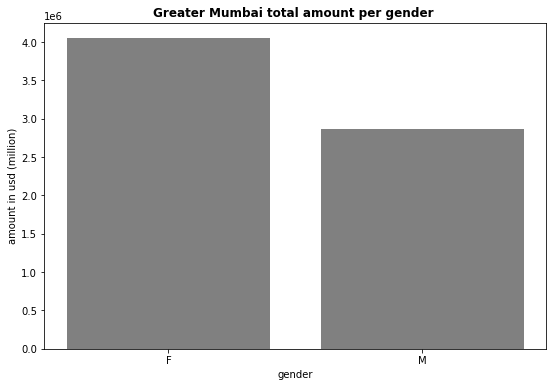

In [23]:
plt.figure(figsize= (9,6))
plt.bar( x= amount_by_mumbai_gender.index,
        height= amount_by_mumbai_gender.values ,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (million)')
plt.title('Greater Mumbai total amount per gender ', fontsize = 12, fontweight = 'bold' )
plt.show()

In [24]:
amount_by_fazilka_gender = amount_by_city_gender.loc['Fazilka',:]
amount_by_fazilka_gender


Gender
M    179.39
Name: Amount_usd, dtype: float64

In [25]:
#Had to confirm i wasnt seeing my own things
india_cc[india_cc['City']== 'Fazilka']

,index,City,Date,Card Type,Exp Type,Gender,Amount,Amount_usd
19538,19538,Fazilka,2014-04-28,Signature,Food,M,14949,179.39


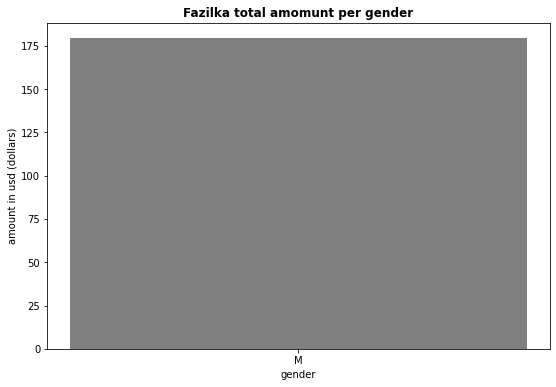

In [26]:
plt.figure(figsize= (9,6))
plt.bar( x= amount_by_fazilka_gender.index,
        height= amount_by_fazilka_gender.values,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (dollars)')
plt.title('Fazilka total amomunt per gender', fontsize = 12, fontweight= 'bold' )
plt.show()

- cardtypes 
- Which card type is the most commonly used in each city?

In [27]:
#checking the unique card types
india_cc['Card Type'].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

In [28]:
#Amount generated overral by each card type
Total_amount_per_card = india_cc.groupby('Card Type')['Amount_usd'].sum().sort_values(ascending = False)
Total_amount_per_card

Card Type
Silver       12835364.48
Signature    12156493.49
Platinum     12091668.12
Gold         11814474.34
Name: Amount_usd, dtype: float64

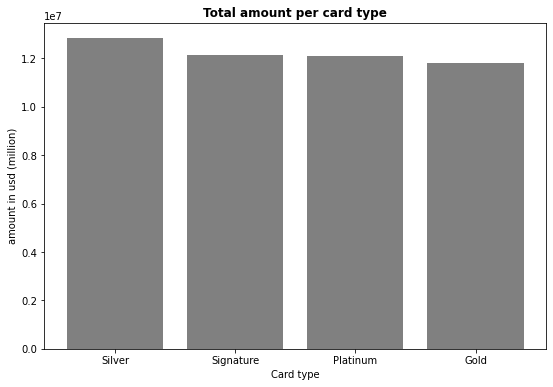

In [66]:
plt.figure(figsize= (9,6))
plt.bar( x= Total_amount_per_card.index,
        height= Total_amount_per_card.values ,
        color ='Grey')
plt.xlabel('Card type')
plt.ylabel('amount in usd (million)')
plt.title('Total amount per card type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [30]:
india_cc.groupby(['Card Type', 'City'])['Amount_usd'].sum().sort_values(ascending = False)


Card Type  City          
Silver     Bengaluru         1897908.96
           Greater Mumbai    1873703.79
           Ahmedabad         1863658.33
           Delhi             1836053.09
Platinum   Ahmedabad         1765629.53
                                ...    
Signature  Vandavasi              25.18
Silver     Nathdwara              20.48
Signature  Sadulpur               17.09
Gold       Dhamtari               16.99
Platinum   Bahraich               14.92
Name: Amount_usd, Length: 3104, dtype: float64

In [31]:
#Checking top city contributers for silver(Highest overall card type)
Silver_with_city = india_cc.groupby(['Card Type', 'City'])['Amount_usd'].sum().sort_values(ascending = False)
top5_cities_silver = Silver_with_city.loc['Silver',:].head(5)
top5_cities_silver

City
Bengaluru         1897908.96
Greater Mumbai    1873703.79
Ahmedabad         1863658.33
Delhi             1836053.09
Kolkata            363125.80
Name: Amount_usd, dtype: float64

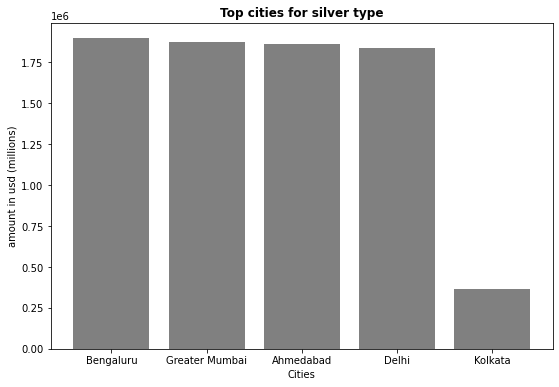

In [63]:
plt.figure(figsize= (9,6))
plt.bar( x= top5_cities_silver.index,
        height= top5_cities_silver.values ,
        color ='Grey')
plt.xlabel('Cities')
plt.ylabel('amount in usd (millions)')
plt.title('Top cities for silver type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [33]:
#Gender comparison for bengaluru
silver = india_cc[india_cc['Card Type'] == 'Silver']
silver_city_gender = silver.groupby(['City', 'Gender'])['Amount_usd'].sum()
silver_bengaluru = silver_city_gender.loc['Bengaluru', :]
silver_bengaluru    

Gender
F    1197771.35
M     700137.61
Name: Amount_usd, dtype: float64

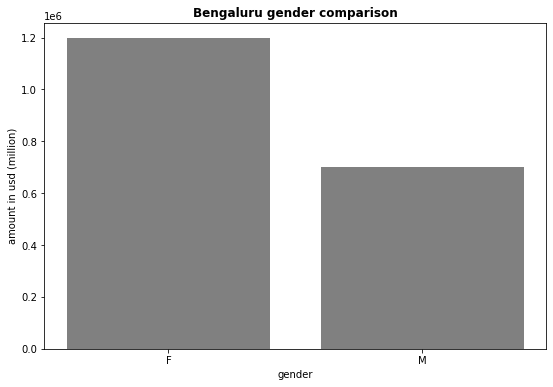

In [34]:
plt.figure(figsize= (9,6))
plt.bar( x= silver_bengaluru.index,
        height= silver_bengaluru.values ,
        color ='Grey')
plt.xlabel('gender')
plt.ylabel('amount in usd (million)')
plt.title('Bengaluru gender comparison', fontsize = 12, fontweight = 'bold' )
plt.show()

In [35]:
#Checking top city contributers for gold (Lowest overall card type)
Gold_with_city = india_cc.groupby(['Card Type', 'City'])['Amount_usd'].sum().sort_values(ascending = False)
top5_cities_gold = Gold_with_city.loc['Gold',:].head(5)
top5_cities_gold

City
Greater Mumbai    1655795.90
Delhi             1635176.40
Bengaluru         1618458.70
Ahmedabad         1590523.93
Chennai            359355.40
Name: Amount_usd, dtype: float64

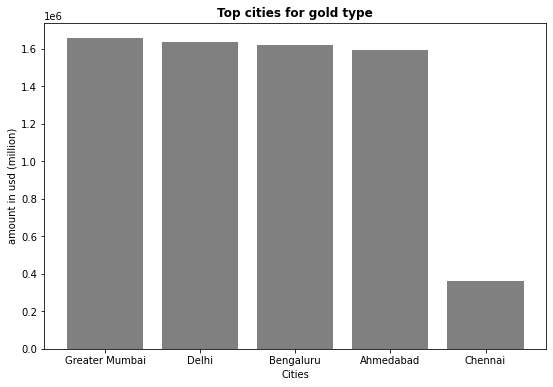

In [62]:
plt.figure(figsize= (9,6))
plt.bar( x= top5_cities_gold.index,
        height= top5_cities_gold.values ,
        color ='Grey')
plt.xlabel('Cities')
plt.ylabel('amount in usd (million)')
plt.title('Top cities for gold type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [37]:
#Gender comparison for Greater Mumbai
Gold = india_cc[india_cc['Card Type'] == 'Gold']
gold_city_gender = Gold.groupby(['City', 'Gender'])['Amount_usd'].sum()
gold_greater_mumbai = gold_city_gender.loc['Greater Mumbai', :]
gold_greater_mumbai   

Gender
F    926421.88
M    729374.02
Name: Amount_usd, dtype: float64

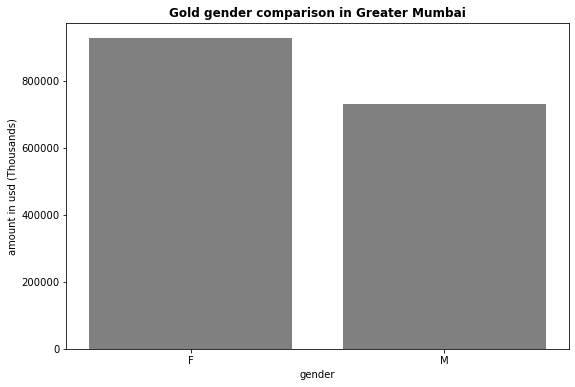

In [38]:
plt.figure(figsize = (9,6))
plt.bar(x = gold_greater_mumbai.index,
        height = gold_greater_mumbai.values,
        color = 'Grey')
plt.ylabel('amount in usd (Thousands)')
plt.xlabel('gender')
plt.title('Gold gender comparison in Greater Mumbai', fontsize = 12, fontweight = 'bold')
plt.show()

- What is the average amount spent per transaction for each card type

In [39]:
india_cc.groupby('Card Type')['Amount_usd'].mean().round(2)

Card Type
Gold         1855.58
Platinum     1889.91
Signature    1885.60
Silver       1876.52
Name: Amount_usd, dtype: float64

- What is the max amount spent per transaction for each card type

In [40]:
india_cc.groupby('Card Type')['Amount_usd'].max().round(2)

Card Type
Gold         11961.05
Platinum     11976.92
Signature    11934.44
Silver       11465.62
Name: Amount_usd, dtype: float64

- How does the amount spent vary by gender across different card types 

In [41]:
india_cc.groupby(['Card Type','Gender'])['Amount_usd'].sum()

Card Type  Gender
Gold       F         6275186.05
           M         5539288.29
Platinum   F         6383282.65
           M         5708385.47
Signature  F         6576062.05
           M         5580431.44
Silver     F         7229201.48
           M         5606163.00
Name: Amount_usd, dtype: float64

- Expense type

In [42]:
Expense_type_total = india_cc.groupby('Exp Type')['Amount_usd'].sum().sort_values(ascending= False)
Expense_type_total

Exp Type
Bills            10884869.65
Food              9896687.75
Fuel              9469629.94
Entertainment     8717250.48
Grocery           8618495.19
Travel            1311067.42
Name: Amount_usd, dtype: float64

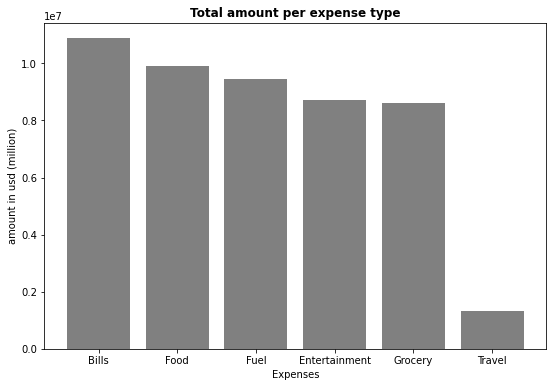

In [61]:
plt.figure(figsize= (9,6))
plt.bar( x= Expense_type_total.index,
        height= Expense_type_total.values ,
        color ='Grey')
plt.xlabel('Expenses')
plt.ylabel('amount in usd (million)')
plt.title('Total amount per expense type', fontsize = 12, fontweight = 'bold' )
plt.show()

In [44]:
#Average expense paid per expense type
india_cc.groupby('Exp Type')['Amount_usd'].mean().sort_values(ascending = False).round(2)


Exp Type
Bills            2143.53
Entertainment    1830.59
Grocery          1812.89
Food             1811.58
Fuel             1801.34
Travel           1776.51
Name: Amount_usd, dtype: float64

In [45]:
#Max expense paid per expense type
india_cc.groupby('Exp Type')['Amount_usd'].max().sort_values(ascending = False)

Exp Type
Bills            11976.92
Entertainment     3599.23
Grocery           3599.04
Fuel              3598.86
Food              3598.04
Travel            3595.42
Name: Amount_usd, dtype: float64

- find any correlation or similarity in expense spending 

In [46]:
#Bills
bills_by_date = india_cc.groupby('Date')['Amount_usd'].sum()
bills_by_date

Date
2013-10-04    116865.06
2013-10-05     96751.60
2013-10-06     83880.66
2013-10-07     93875.90
2013-10-08     69990.42
                ...    
2015-05-22     79366.35
2015-05-23     76725.57
2015-05-24     86062.95
2015-05-25     62120.04
2015-05-26     91102.06
Name: Amount_usd, Length: 600, dtype: float64

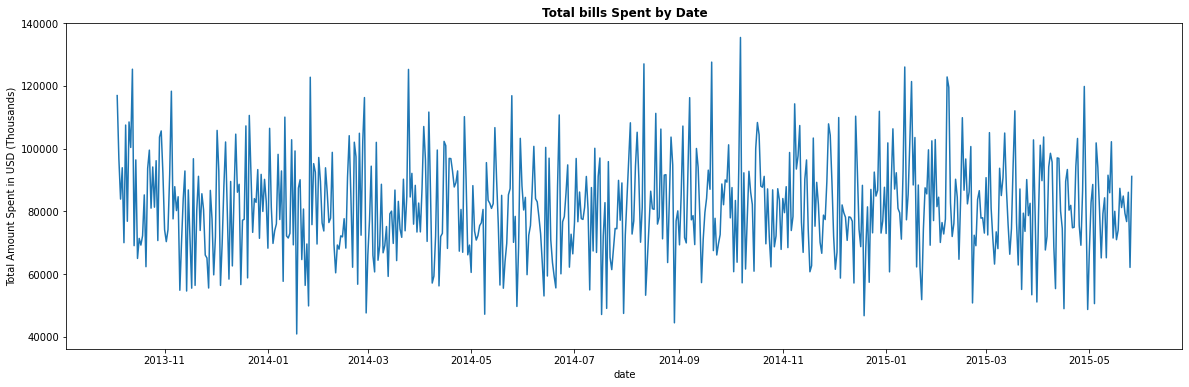

In [47]:
plt.figure(figsize = (20,6))
plt.plot(bills_by_date.index, bills_by_date.values,)
plt.xlabel('date')
plt.ylabel('Total Amount Spent in USD (Thousands)')
plt.title('Total bills Spent by Date', fontsize = 12, fontweight = 'bold')
plt.show()

In [48]:
#Finding days where bills passed the average spending expense
mean_of_sum_bills = round(bills_by_date.mean(),2)
mean_of_sum_bills

81496.67

In [49]:
days_above_avg_bills = bills_by_date[ bills_by_date >= 81496.67]
days_above_avg_bills

Date
2013-10-04    116865.06
2013-10-05     96751.60
2013-10-06     83880.66
2013-10-07     93875.90
2013-10-09    107479.76
                ...    
2015-05-14    102164.29
2015-05-19     87313.70
2015-05-21     84855.31
2015-05-24     86062.95
2015-05-26     91102.06
Name: Amount_usd, Length: 282, dtype: float64

- Top cities in each expense type 

In [52]:
exp_type_city = india_cc.groupby(['Exp Type', 'City'])['Amount_usd'].sum().sort_values(ascending= False)
exp_type_city

Exp Type       City          
Bills          Greater Mumbai    1842786.85
               Bengaluru         1697993.06
               Ahmedabad         1695476.43
               Delhi             1683000.16
Food           Bengaluru         1485640.93
                                    ...    
Grocery        Dhamtari               16.99
Entertainment  Rahuri                 16.66
Food           Bahraich               14.92
Grocery        Bhabua                 13.48
Food           Murshidabad            12.22
Name: Amount_usd, Length: 3500, dtype: float64

In [54]:
bills_city = exp_type_city.loc['Bills'].head(5)
bills_city

City
Greater Mumbai    1842786.85
Bengaluru         1697993.06
Ahmedabad         1695476.43
Delhi             1683000.16
Kolkata            258509.90
Name: Amount_usd, dtype: float64

In [55]:
food_city = exp_type_city.loc['Food'].head(5)
food_city

City
Bengaluru         1485640.93
Delhi             1441569.82
Ahmedabad         1409600.00
Greater Mumbai    1361450.38
Surat              264993.90
Name: Amount_usd, dtype: float64

In [56]:
fuel_city =  exp_type_city.loc['Fuel'].head(5)
fuel_city

City
Bengaluru         1416796.47
Ahmedabad         1398000.05
Greater Mumbai    1394812.33
Delhi             1384187.34
Pune               253701.99
Name: Amount_usd, dtype: float64

In [57]:
entertainment_city =  exp_type_city.loc['Entertainment'].head(5)
entertainment_city

City
Ahmedabad         1170027.18
Bengaluru         1152733.00
Greater Mumbai    1147160.70
Delhi             1059395.83
Surat              293765.53
Name: Amount_usd, dtype: float64

In [58]:
groceries_city =  exp_type_city.loc['Grocery'].head(5)
groceries_city

City
Greater Mumbai    1174807.36
Ahmedabad         1140428.29
Delhi             1114997.20
Bengaluru         1114757.23
Hyderabad          274211.67
Name: Amount_usd, dtype: float64

In [60]:
travel_city =  exp_type_city.loc['Travel'].head(5)
travel_city

City
Chennai      194928.50
Jaipur       183040.17
Kanpur       180200.35
Hyderabad    176880.64
Pune         147630.35
Name: Amount_usd, dtype: float64